# Titanic: Machine Learning from Disaster

## Importing Packages

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




## Reading training and testing data

In [95]:
train = pd.read_csv('train.csv', na_values=['NaN'])
test = pd.read_csv('test.csv', na_values=['NaN'])

# Printing Data Columns
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Analyzing The Data

In [97]:
# Printing Data Info
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [98]:
# Printing sample data
print(train.loc[11:15])

    PassengerId  Survived  Pclass                                  Name  \
11           12         1       1              Bonnell, Miss. Elizabeth   
12           13         0       3        Saundercock, Mr. William Henry   
13           14         0       3           Andersson, Mr. Anders Johan   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
15           16         1       2      Hewlett, Mrs. (Mary D Kingcome)    

       Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
11  female  58.0      0      0     113783  26.5500  C103        S  
12    male  20.0      0      0  A/5. 2151   8.0500   NaN        S  
13    male  39.0      1      5     347082  31.2750   NaN        S  
14  female  14.0      0      0     350406   7.8542   NaN        S  
15  female  55.0      0      0     248706  16.0000   NaN        S  


In [99]:
# Printing Description of the dataset
print(train.describe(include=['O']))

print("\n\n")
print(train.describe())

                            Name   Sex Ticket        Cabin Embarked
count                        891   891    891          204      889
unique                       891     2    681          147        3
top     Daly, Mr. Eugene Patrick  male   1601  C23 C25 C27        S
freq                           1   577      7            4      644



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        F

In [100]:
# Printing number of null values in each column
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- From the above data we can categorize the features into following categories:

- **Numerical**
	- Age	
	- SibSp
	- Parch
	- Fare

- **Categorical**
	- Pclass: 1/2/3
	- Sex: male/female
	- Embarked: S/C/Q
	- Cabin: 147 Values

- Name, PassengerId are unique for every entry and hence cannot be a decisive factor in influencing the survival status.
- Also ticket has high number of unique values and logically ticket number cannot influence the survival status. Though the ticket number can be helpful in determining the Class of travel but information is already available through the Pclass column.
- Though Cabin feature can contribute to determine the survival status, but a large amount records have the Cabin feature as null which could corrupt our training process, hence we need to neglect the cabin feature.
- Though Age also have around 1/8th values as null but considering the logical fact that age can influence the survival status we would handle this anomaly in a different way.
- Hence, dropping the columns name, passengerid, cabin and ticket from the dataset

## Removing Unwanted Features As Per Above Discussion

In [101]:
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


## Analyzing Relation Between Survival Status and the Features

- Now we will compare the Survived Column data with other Columns by using neccesary diagrams or statistics

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


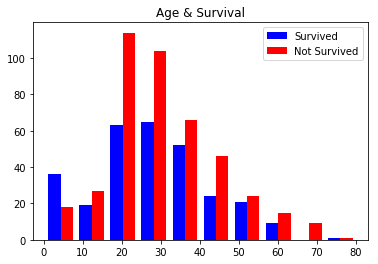

In [104]:
plt.hist([train[train['Survived'] == 1]['Age'].dropna(), train[train['Survived'] == 0]['Age'].dropna()], 
         color=['b', 'r'],
         label=['Survived', 'Not Survived'],
         histtype='bar', 
         stacked=False)
plt.title("Age & Survival")
plt.legend()
plt.show()

- In the above diagram we have made a comparative study of age and survival status, blue bars indicate survived passengers and red bars indicate the unfortunate ones.
- It is clear that passengers below the age of 10 had a higher chance of survival compared to other ages.
- Hence, survival status is dependent on the age of the passenger.

- In order to deal with missing values in Age column, the only way is to initialize with a random value between minimum and maximum age.

## Implementing above points

In [105]:
min_age = (int)(min(train['Age'].dropna().values))
max_age = (int)(max(train['Age'].dropna().values))

# Eliminating NaN values from Age column
for i,row in train.iterrows():
    if math.isnan(row['Age']):
        train.set_value(i, 'Age', random.randint(min_age, max_age))


# Discretizing Age
# Finding ranges for Fare
cuts = pd.qcut(train['Age'], 5)
a = pd.value_counts(cuts)

ranges = a.index.categories

# Discretizing Fare Price according to the quantiles
for i,row in train.iterrows():
    if row['Age'] in ranges[0]:
        train.set_value(i, 'AgeCategory', 0)
    elif row['Age'] in ranges[1]:
        train.set_value(i, 'AgeCategory', 1)
    elif row['Age'] in ranges[2]:
        train.set_value(i, 'AgeCategory', 2)
    else:
        train.set_value(i, 'AgeCategory', 3)


- Now let us compare survival status and Pclass

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


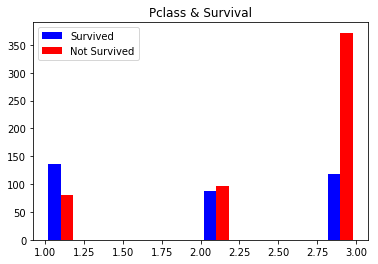

In [107]:
plt.hist([train[train['Survived'] == 1]['Pclass'].dropna(), train[train['Survived'] == 0]['Pclass'].dropna()], 
         color=['b', 'r'],
         label=['Survived', 'Not Survived'],
         histtype='bar', 
         stacked=False)
plt.legend()
plt.title("Pclass & Survival")
plt.show()

- In the above diagram we can clearly see that the first class passengers have a higher probabitlity to survive whereas the third class passengers have a lower chances to survive.
- Hence, Pclass is an important feature to predict survival status

### Similarily let us plot histograms for Sex, Embarked feature

- In order to plot histograms for sex and embarked feature we need to convert them into numerical values.
- For Sex feature, we will allot 1 for Male and 2 for Female.
- For Embarked feature, we will allot 1 for S, 2 for C and 3 for Q
- But before we convert it we must remove NaN values from the Embarked column. We will assign the most occurring embarking point to the Nan values assuming the fact that there is high probability for the passengers to embark from high density emabarking point.

In [108]:
# Finding the most occurring embarking point in the list
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

- It is clear from the 'top' parameter in the description that 'S' is the most occuring value

In [109]:
# Filling NaN values of Embarked with 'S'
train['Embarked'] = train['Embarked'].fillna('S')

# Converting Sex and Embarked values into integers
train['Sex'] = train['Sex'].map({'male':1, 'female':2}).astype(int) 
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2,'Q': 3}).astype(int)

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


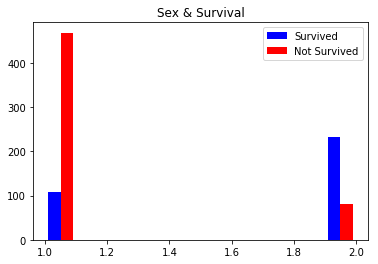

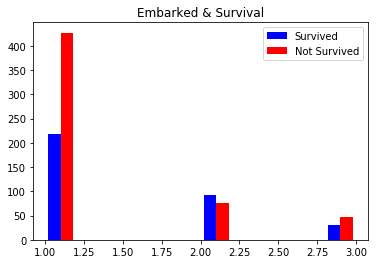

In [110]:
plt.hist([train[train['Survived'] == 1]['Sex'].dropna(), train[train['Survived'] == 0]['Sex'].dropna()], 
         color=['b', 'r'],
         label=['Survived', 'Not Survived'],
         histtype='bar',
         stacked=False)
plt.title('Sex & Survival')
plt.legend()
plt.show()


plt.hist([train[train['Survived'] == 1]['Embarked'].dropna(), train[train['Survived'] == 0]['Embarked'].dropna()], 
         color=['b', 'r'], 
         label = ['Survived', 'Not Survived'],
         histtype='bar',
         stacked=False)
plt.title('Embarked & Survival')
plt.legend()
plt.show()

- The above graphs clearly show there is a strong relation between both sex and embarked value with the survival status. Hence, we keep both of the features

### Now, we will consider SibSp (# Siblings/Spouse) and Parch ( # Parents/Children)

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


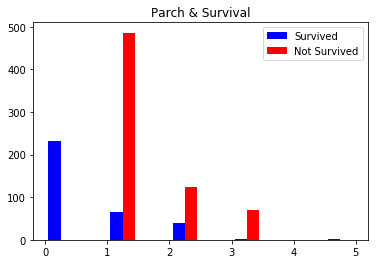

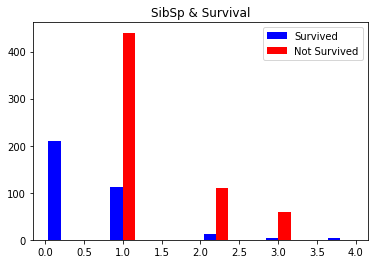

In [111]:
plt.hist([train[train['Survived'] == 1]['Parch'].dropna(), train[train['Parch'] == 0]['Embarked'].dropna()], 
         color=['b', 'r'], 
         label=['Survived', 'Not Survived'],
         histtype='bar',
         stacked=False)
plt.title('Parch & Survival')
plt.legend()
plt.show()

plt.hist([train[train['Survived'] == 1]['SibSp'].dropna(), train[train['SibSp'] == 0]['Embarked'].dropna()], 
         color=['b', 'r'], 
         label = ['Survived', 'Not Survived'],
         histtype='bar',
         stacked=False)
plt.legend()
plt.title('SibSp & Survival')
plt.show()

- The above graphs show us that if a passenger is travelling alone he/she has higher chances to survive. So let us now combine both the parameters i.e. SibSp and Parch into a single parameter Family Size and compare the new parameter with the survival status

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


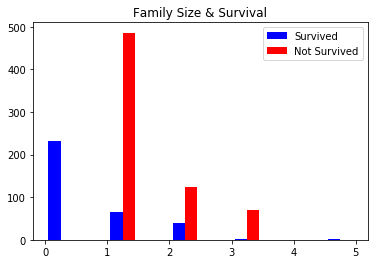

In [112]:
# Calculating total family size of a passenger by summing up SibSp and Parch
train['FamilySize'] = train['SibSp'] + train['Parch']

# Plotting Family Size vs Survival Status
plt.hist([train[train['Survived'] == 1]['Parch'].dropna(), train[train['Parch'] == 0]['Embarked'].dropna()], 
         color=['b', 'r'], 
         label=['Survived', 'Not Survived'],
         histtype='bar',
         stacked=False)
plt.legend()
plt.title('Family Size & Survival')
plt.show()

### Now the final parameter is Fare, let us analyze it

- Fare is a numerical feature and has varying values.
- One approach could be to discretize the values into categories. But before let us observe the histogram of the same.

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


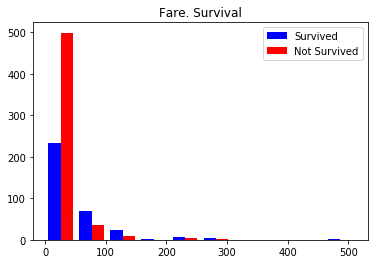

In [113]:
plt.hist([train[train['Survived'] == 1]['Fare'].dropna(), train[train['Survived'] == 0]['Fare'].dropna()], 
         color=['b', 'r'], 
         histtype='bar',
         label = ['Survived', 'Not Survived'],
         stacked=False)
plt.legend()
plt.title('Fare. Survival')
plt.show()

- Passengers paying lower fares had a low chances of survival. Hence there is some relation between fare and survival. Let us discretize into 6 buckets using the function qcut()

In [114]:
# Finding quantile ranges for Fare
cuts = pd.qcut(train['Fare'], 4)
a = pd.value_counts(cuts)

ranges = a.index.categories

# Discretizing Fare Price according to the quantiles
for i,row in train.iterrows():
    if row['Fare'] in ranges[0]:
        train.set_value(i, 'FareCategory', 0)
    elif row['Fare'] in ranges[1]:
        train.set_value(i, 'FareCategory', 1)
    elif row['Fare'] in ranges[2]:
        train.set_value(i, 'FareCategory', 2)
    else:
        train.set_value(i, 'FareCategory', 3)


- As we do not require the Fare, Age, SibSp and Parch feature we will drop the column and now we have the final set of features and labels ready to be trained

In [115]:
train = train.drop(['Fare', 'SibSp', 'Parch', 'Age'], 1)
train.tail()

,Survived,Pclass,Sex,Embarked,AgeCategory,FamilySize,FareCategory
886,0,2,1,1,2.0,0,1.0
887,1,1,2,1,1.0,0,2.0
888,0,3,2,1,2.0,3,2.0
889,1,1,1,2,2.0,0,2.0
890,0,3,1,3,2.0,0,0.0


- In the above dataset our features and labels are as follows:
	
	**Features**
	- Pclass
	- Sex
	- Age
	- Embarked
	- FamilySize
	- FareCategory

	**Labels**
	- Survived

## Training the model using SVC

In [116]:
# Separating Features and Labels

labels = train['Survived'].values
features = train[['Pclass', 'Sex', 'AgeCategory', 'FamilySize', 'Embarked', 'FareCategory']].values

In [117]:
# Splitting training dataset into testing and training set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, shuffle=True)



In [118]:
# Implementing various models to train the model

## Implementing SVC

model_a =SVC()

model_a.fit(X_train, y_train)

# Testing model
print("SVC")
print('Accuracy:', model_a.score(X_test, y_test))
print('----------------------------------------------------------------')

## Implementing K Nearest Neighbours

model_b = KNeighborsClassifier(n_neighbors=5)

model_b.fit(X_train, y_train)

# Testing model
print("K Nearest Neighbours")
print('Accuracy:', model_b.score(X_test, y_test))
print('----------------------------------------------------------------')

## Implementing Decision Tree

model_c =DecisionTreeClassifier()

model_c.fit(X_train, y_train)

# Testing model
print("Decision Tree")
print('Accuracy:', model_c.score(X_test, y_test))
print()
print('----------------------------------------------------------------')

## Implementing Random Forest

model_d = RandomForestClassifier(n_estimators=15)

model_d.fit(X_train, y_train)

# Testing model
print("Random Forest")
print('Accuracy:', model_d.score(X_test, y_test))
print()
print('----------------------------------------------------------------')


SVC
Accuracy: 0.823728813559
----------------------------------------------------------------
K Nearest Neighbours
Accuracy: 0.776271186441
----------------------------------------------------------------
Decision Tree
Accuracy: 0.816949152542

----------------------------------------------------------------
Random Forest
Accuracy: 0.779661016949

----------------------------------------------------------------


- As **SVC** performs best amongst the others, we choose SVC for our problem

## Converting the test data provided for the competetion in the appropriate format for our model

In [119]:
test = pd.read_csv('test.csv', na_values=['NaN'])
test_pid = test['PassengerId']
print(test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- As we can see the test data has Nan value in the Fare column, we will assign a random fare value between the minium and maximum fare

In [120]:
min_fare = ranges[0].left
max_fare = ranges[3].right

for i,row in test.iterrows():
    if math.isnan(row['Fare']):
        test.set_value(i, 'Fare', random.randint(min_age, max_age))

In [121]:
# Eliminating NaN values from Age column
for i,row in test.iterrows():
    if math.isnan(row['Age']):
        test.set_value(i, 'Age', random.randint(min_age, max_age))

# Filling NaN values of Embarked with 'S'
test['Embarked'] = test['Embarked'].fillna('S')

# Converting Sex and Embarked values into integers
test['Sex'] = test['Sex'].map({'male':1, 'female':2}).astype(int) 
test['Embarked'] = test['Embarked'].map({'S': 1, 'C': 2,'Q': 3}).astype(int)

# Calculating total family size of a passenger by summing up SibSp and Parch
test['FamilySize'] = test['SibSp'] + test['Parch']

# Discretizing Fare Price according to the quantiles
for i,row in test.iterrows():
    if int(row['Fare']) in ranges[0]:
        test.set_value(i, 'FareCategory', 0)
    elif row['Fare'] in ranges[1]:
        test.set_value(i, 'FareCategory', 1)
    elif row['Fare'] in ranges[2]:
        test.set_value(i, 'FareCategory', 2)
    else:
        test.set_value(i, 'FareCategory', 3)

# Discretizing Age 
for i,row in test.iterrows():
    if row['Age'] in ranges[0]:
        test.set_value(i, 'AgeCategory', 0)
    elif row['Age'] in ranges[1]:
        test.set_value(i, 'AgeCategory', 1)
    elif row['Age'] in ranges[2]:
        test.set_value(i, 'AgeCategory', 2)
    else:
        test.set_value(i, 'AgeCategory', 3)
        
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age'], 1)

test.tail()

,Pclass,Sex,Embarked,FamilySize,FareCategory,AgeCategory
413,3,1,1,0,1.0,2.0
414,1,2,2,0,3.0,3.0
415,3,1,1,0,0.0,3.0
416,3,1,1,0,1.0,3.0
417,3,1,2,2,2.0,3.0


## Writing Output

In [122]:
import csv
import numpy as np

features = test[['Pclass', 'Sex', 'AgeCategory', 'FamilySize', 'Embarked', 'FareCategory']].values

result = model_a.predict(features)


data = np.transpose(np.vstack((test_pid, result)))

with open('result.csv', 'w', newline='') as f:
    writer = csv.writer(f)

    writer.writerows([['PassengerId', 'Survived']])
    writer.writerows(data)
